# PROJET UA3_partie1
#### Réalisé par:
### FEUSSI NGUEMKAM ANGELE BLANDINE , 2741641

NOTEBOOK_1: dans ce notebook, nous avons fusionné nous deus laboratoires et diviser en trois clusters et avons entrainer les reseaux de neuronnes. les interpretations sont faites au fur et à mesure . 


#### Importations des bibliotheques

In [2]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.tree import DecisionTreeClassifier, plot_tree
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay, accuracy_score, classification_report,roc_auc_score
import matplotlib.pyplot as plt
import seaborn as sns

#### Importations des deux datasets

In [3]:
lab1 = pd.read_csv("diabete_labo1.csv")
lab2 = pd.read_csv("diabete_labo2.csv")

#### fusion des datasets et pretraitement

In [4]:
#  Supprimer les colonnes inutiles
lab1 = lab1.drop(columns=["Diabetes_012"], errors="ignore").copy()
lab2 = lab2.drop(columns=["Unnamed: 0"], errors="ignore").copy()

In [5]:
# Ajouter une colonne de provenance pour différencier les sources
lab2["source"] = "non étiquetée"
lab1["source"] = "étiquetée"

In [6]:
# fusion
df_fusion = pd.concat([lab1, lab2], ignore_index=True)

In [7]:
df_fusion.duplicated().sum()

np.int64(27815)

In [8]:
#Supprimer les doublons exacts (même ligne entière)
df_fusion = df_fusion.drop_duplicates()

In [9]:
labo = df_fusion.copy()

In [10]:
# Vérification
print("Taille finale de la base fusionnée :", labo.shape[0])
print("Répartition des sources :\n", labo["source"].value_counts())

Taille finale de la base fusionnée : 296557
Répartition des sources :
 source
étiquetée        227908
non étiquetée     68649
Name: count, dtype: int64


In [11]:
labo.duplicated().sum()

np.int64(0)

In [44]:
labo.describe()

,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
count,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,...,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000,296557.000000
mean,0.480653,0.461695,0.962779,28.987763,0.470223,0.049491,0.114801,0.723028,0.609795,0.791042,...,0.947491,0.094285,2.665012,3.609950,5.005665,0.203880,0.441861,8.197793,4.957408,5.823929
std,0.499626,0.498531,0.189302,6.910697,0.499113,0.216892,0.318782,0.447503,0.487797,0.406565,...,0.223052,0.292226,1.082519,7.861267,9.350650,0.402881,0.496609,3.052947,1.002578,2.116159
min,0.000000,0.000000,0.000000,12.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,...,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000
25%,0.000000,0.000000,1.000000,24.000000,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,...,1.000000,0.000000,2.000000,0.000000,0.000000,0.000000,0.000000,6.000000,4.000000,4.000000
50%,0.000000,0.000000,1.000000,28.000000,0.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,0.000000,0.000000,0.000000,0.000000,9.000000,5.000000,6.000000
75%,1.000000,1.000000,1.000000,32.000000,1.000000,0.000000,0.000000,1.000000,1.000000,1.000000,...,1.000000,0.000000,3.000000,2.000000,5.000000,0.000000,1.000000,10.000000,6.000000,8.000000
max,1.000000,1.000000,1.000000,98.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,...,1.000000,1.000000,5.000000,30.000000,30.000000,1.000000,1.000000,13.000000,6.000000,8.000000


In [45]:
labo.columns

Index(['HighBP', 'HighChol', 'CholCheck', 'BMI', 'Smoker', 'Stroke',
       'HeartDiseaseorAttack', 'PhysActivity', 'Fruits', 'Veggies',
       'HvyAlcoholConsump', 'AnyHealthcare', 'NoDocbcCost', 'GenHlth',
       'MentHlth', 'PhysHlth', 'DiffWalk', 'Sex', 'Age', 'Education', 'Income',
       'source'],
      dtype='object')

In [46]:
labo.info()

<class 'pandas.core.frame.DataFrame'>
Index: 296557 entries, 0 to 324371
Data columns (total 22 columns):
 #   Column                Non-Null Count   Dtype  
---  ------                --------------   -----  
 0   HighBP                296557 non-null  float64
 1   HighChol              296557 non-null  float64
 2   CholCheck             296557 non-null  float64
 3   BMI                   296557 non-null  float64
 4   Smoker                296557 non-null  float64
 5   Stroke                296557 non-null  float64
 6   HeartDiseaseorAttack  296557 non-null  float64
 7   PhysActivity          296557 non-null  float64
 8   Fruits                296557 non-null  float64
 9   Veggies               296557 non-null  float64
 10  HvyAlcoholConsump     296557 non-null  float64
 11  AnyHealthcare         296557 non-null  float64
 12  NoDocbcCost           296557 non-null  float64
 13  GenHlth               296557 non-null  float64
 14  MentHlth              296557 non-null  float64
 15  PhysH

#### generation d'un heatmap de correlation

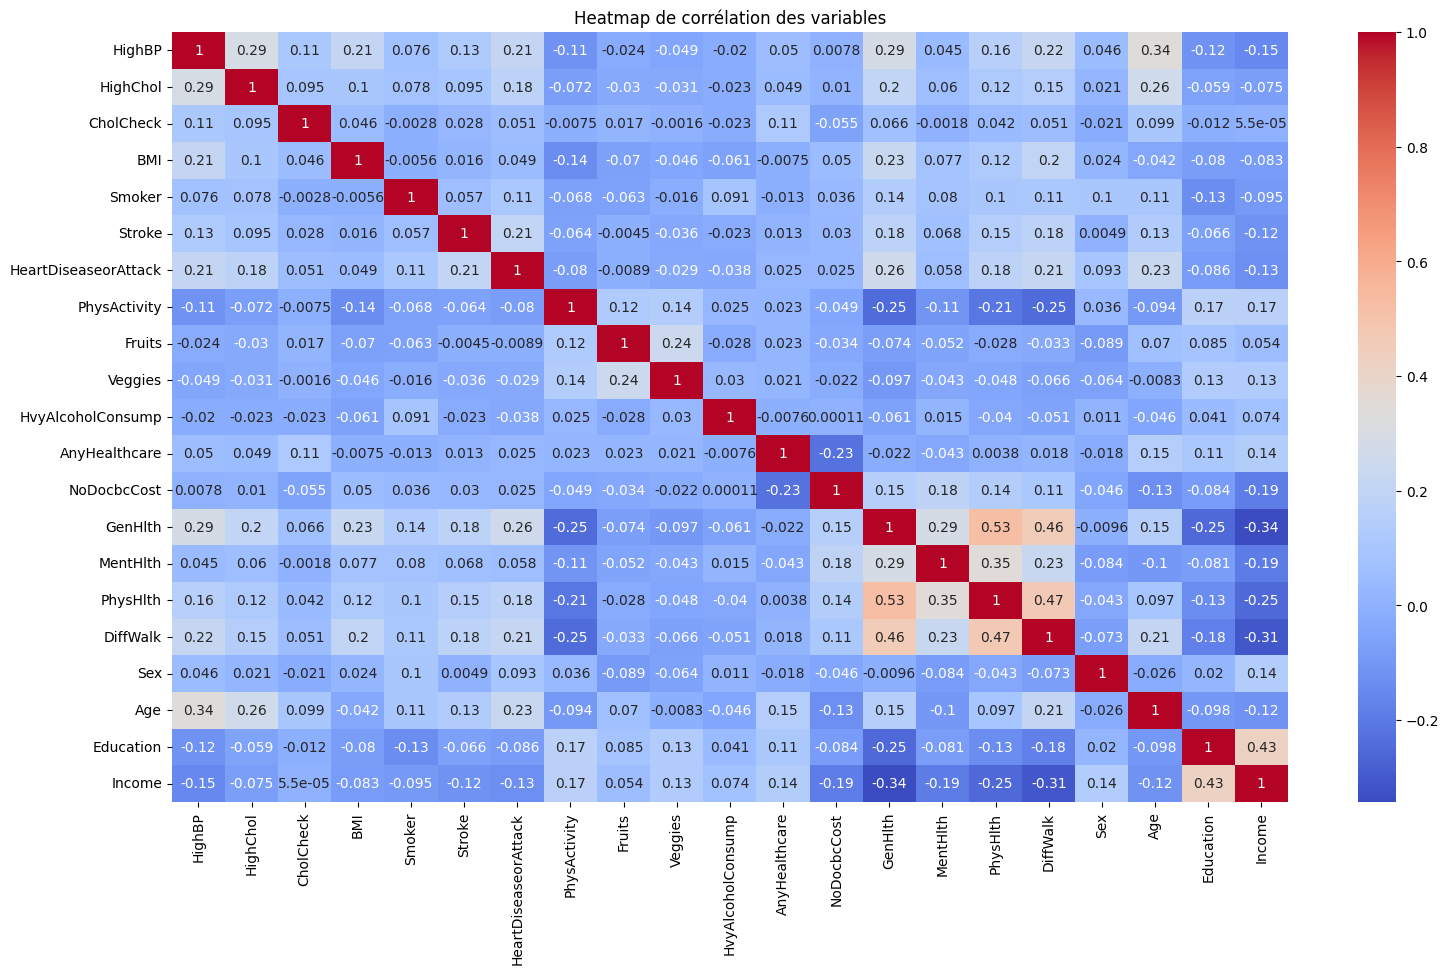

In [12]:
plt.figure(figsize=(18, 10))

# Sélection des colonnes numériques uniquement
numeric_data = labo.select_dtypes(include=[np.number])

# Corrélation + heatmap
sns.heatmap(numeric_data.corr(), cmap="coolwarm", annot=True)
plt.title("Heatmap de corrélation des variables")
plt.show()


interpretation heatmap: d'apres la matrice de correlation, nous constatons qu'il existe une forte correlation entre les variables "physhth" et "genthth"; les variables "genthth"et "diffwalk", les variables "physhth"et "diffwalk", les variables "education"et incone et enfin les variables 
Interprétation de la heatmap de corrélation
Forte corrélation (|r| > 0.45)
GenHlth vs MentHlth → r ≈ 0.49
Plus la santé générale est perçue comme mauvaise, plus la santé mentale est altérée.
GenHlth vs PhysHlth → r ≈ 0.49
Même logique : mauvaise santé générale ↔ santé physique perçue négativement.
PhysHlth vs DiffWalk → r ≈ 0.45
Logique : difficulté à marcher associée à une mauvaise santé physique.
GenHlth vs DiffWalk → r ≈ 0.42
Les gens qui se déclarent en mauvaise santé générale ont souvent du mal à marcher.

Corrélation modérée (0.3 < |r| ≤ 0.45)
Education vs Income → r ≈ 0.40
Les personnes avec un niveau d'éducation plus élevé ont généralement un revenu plus élevé. Corrélation logique.
Age vs HighBP → r ≈ 0.33
L’hypertension augmente avec l’âge.
Age vs HighChol → r ≈ 0.26
Même logique que ci-dessus pour le cholestérol.

Corrélation faible (|r| < 0.25)
La plupart des autres variables ont des corrélations très faibles ou quasi nulles (r < 0.1), ce qui indique une faible relation linéaire directe.

In [13]:
labo.to_csv("base_fusion_sans doublons.csv", index=False)

In [ ]:
#  Liste des variables quantitatives dans la base originale (avant encodage)
variables = ['BMI', 'MentHlth', 'PhysHlth']

#  les boxplots pour chaque variable quantitative
for col in variables:
    plt.figure(figsize=(6, 4))
    plt.boxplot(labo[col], patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(f'Boxplot de la variable {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

### Winsorisation de la variable BMI
nous constatons que pour la variable BMI(indice de masse corporelle) la mediane est autour de 27 et le quartile superieur autour de 33 et la plupart des valeurs aberrantes sont au dela de 40 et vont jusquu'à 100. la winsorisation permettra de conserver les lignes et de modifier les valeurs extrêmes en ramenant les valeurs inferieures au premier percentile par la valeur du 1er percentile et les valeurs superieures au 99e percentile par celle du 99. malgre le fait que les données soient modifiées la winsorisation évite que les valeurs extrêmes dominent la normalisation ou le calcul des distance.

In [14]:
from scipy.stats.mstats import winsorize

labo['BMI'] = winsorize(labo['BMI'], limits=[0.01, 0.01])  # coupe les 1% extrêmes


### normalisation des variables BMI, Menthlth et physhlth

In [ ]:
for col in variables:
    plt.figure(figsize=(6, 4))
    plt.boxplot(labo[col], patch_artist=True, boxprops=dict(facecolor='skyblue'))
    plt.title(f'Boxplot de la variable {col}')
    plt.ylabel(col)
    plt.grid(True)
    plt.show()

#### labelisation 

In [15]:
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans

# Sélection de toutes les colonnes numériques (y compris celles à normaliser)
X_numeric = labo.select_dtypes(include='number')

# Normalisation
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X_numeric)

# Facultatif : récupérer le nom des colonnes si tu veux un DataFrame normalisé
X_scaled_df = pd.DataFrame(X_scaled, columns=X_numeric.columns)


In [ ]:
print(X_scaled_df.head())


Répartition des pseudo-labels :
pseudo_label
0    141461
2     87160
1     67936
Name: count, dtype: int64


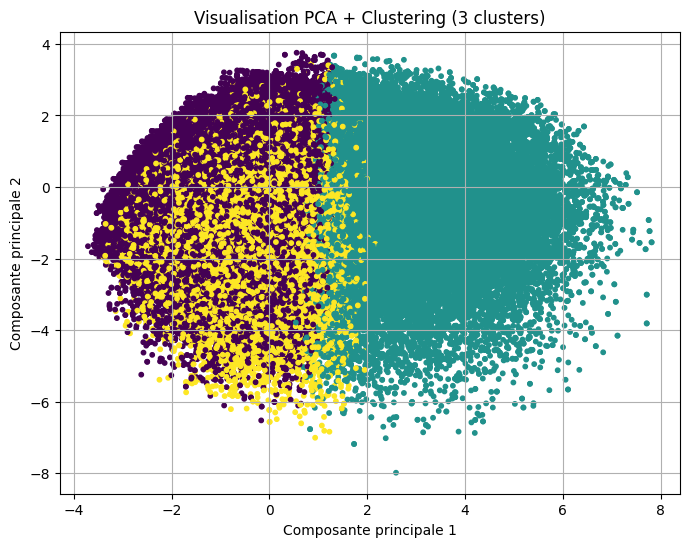

In [17]:
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# Réduction de dimension à 2 composantes
X_pca = PCA(n_components=2).fit_transform(X_scaled_df)
clusters = KMeans(n_clusters=3, random_state=42).fit_predict(X_scaled_df)

labo['pseudo_label'] = clusters
print("Répartition des pseudo-labels :")
print(labo['pseudo_label'].value_counts())

# Affichage
plt.figure(figsize=(8, 6))
plt.scatter(X_pca[:, 0], X_pca[:, 1], c=clusters, cmap='viridis', s=10)
plt.title("Visualisation PCA + Clustering (3 clusters)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.show()


#### score de silhouette

In [19]:
from sklearn.metrics import silhouette_score, calinski_harabasz_score, davies_bouldin_score
import numpy as np, time
X = X_scaled_df.astype(np.float32, copy=False)

t0 = time.time()

kmeans = KMeans(
    n_clusters=3,      
    n_init=20,    
    max_iter=300,
    random_state=42,
    algorithm="elkan"  
)
labels = kmeans.fit_predict(X)

fit_time = time.time()

sil = silhouette_score(
    X, labels,
    metric="euclidean",
    sample_size=min(20000, X.shape[0]),  
    random_state=42
)
ch = calinski_harabasz_score(X, labels)
db = davies_bouldin_score(X, labels)

t1 = time.time()

print(f"KMeans fit:        {fit_time - t0:.2f}s")
print(f"Silhouette(échant): {sil:.4f}")
print(f"Calinski-Harabasz: {ch:.1f}  (↑ mieux)")
print(f"Davies-Bouldin:    {db:.4f}  (↓ mieux)")
print(f"Total:             {t1 - t0:.2f}s")


KMeans fit:        10.69s
Silhouette(échant): 0.1774
Calinski-Harabasz: 27973.6  (↑ mieux)
Davies-Bouldin:    2.2829  (↓ mieux)
Total:             26.22s


Interpretation:~0.18 = séparation faible mais non nulle (souvent “acceptable” pour du pseudo‑labelling si tu filtres par confiance).
Les trois indicateurs convergent vers l’idée que la séparation en trois clusters est modérée : la structure est présente mais pas très nette, et il subsiste un chevauchement notable entre les groupes. Pour améliorer la qualité du clustering, il faudrait envisager un enrichissement ou une transformation des variables, ou un filtrage des points peu confiants avant l’utilisation dans un modèle de réseau de neurones.

##### optimisation silhouette

In [20]:
from sklearn.cluster import MiniBatchKMeans, KMeans
X = X_scaled_df.astype(np.float32, copy=False).to_numpy()

t0 = time.time()
pca_full = PCA(n_components=None, svd_solver="full", random_state=42)
Z = pca_full.fit_transform(X)
cum = np.cumsum(pca_full.explained_variance_ratio_)
n90 = int(np.searchsorted(cum, 0.90) + 1)
n_comps = min(20, X.shape[1], max(2, n90))  # borne entre 2 et 20

pca = PCA(n_components=n_comps, svd_solver="randomized", random_state=42)
Z = pca.fit_transform(X)
t_pca = time.time()

#  Baseline rapide avec KMeans 
km = KMeans(n_clusters=3, n_init=20, max_iter=300, tol=1e-3,
            algorithm="elkan", random_state=42)
labels_km = km.fit_predict(Z)
sil_km = silhouette_score(Z, labels_km, sample_size=min(20000, Z.shape[0]), random_state=42)

#  MiniBatchKMeans: grid sur batch_size
batch_grid = [2048, 4096, 8192, 16384]
best = {"sil": -1, "batch": None, "labels": None, "model": None, "fit_s": None}

for bs in batch_grid:
    t_fit0 = time.time()
    mbk = MiniBatchKMeans(
        n_clusters=3,
        batch_size=bs,
        n_init=20,          
        max_iter=100,    
        random_state=42
    )
    labels = mbk.fit_predict(Z)
    t_fit = time.time()
    sil = silhouette_score(Z, labels, sample_size=min(20000, Z.shape[0]), random_state=42)

    if sil > best["sil"]:
        best.update({"sil": sil, "batch": bs, "labels": labels, "model": mbk, "fit_s": t_fit - t_fit0})

t1 = time.time()

print(f"PCA -> {n_comps} composantes  |  temps: {t_pca - t0:.2f}s")
print(f"[Baseline] KMeans(elkan)  silhouette={sil_km:.4f}")
print(f"[MiniBatch] BEST batch_size={best['batch']}  silhouette={best['sil']:.4f}  fit={best['fit_s']:.2f}s")
print(f"Total: {t1 - t0:.2f}s")

#  Choix et affectation des pseudo-labels ---
# Si MiniBatch gagne, on garde ses labels; sinon, ceux de KMeans
use_labels = best["labels"] if best["sil"] >= sil_km else labels_km
labo["pseudo_label"] = use_labels.astype(int)

#  Confiance simple via distance au centroïde dans l’espace Z
from sklearn.metrics import pairwise_distances
centers = (best["model"].cluster_centers_
           if best["sil"] >= sil_km else km.cluster_centers_)
D = pairwise_distances(Z, centers)
closest = D.min(axis=1)
conf = 1.0 - (np.argsort(np.argsort(closest)) / (closest.size - 1)) 
labo["pseudo_confidence"] = conf.astype(np.float32)


PCA -> 17 composantes  |  temps: 1.03s
[Baseline] KMeans(elkan)  silhouette=0.0816
[MiniBatch] BEST batch_size=2048  silhouette=0.1737  fit=2.00s
Total: 57.46s


Interpretation: cette approche n'est pas optimale car il yya plutot resuction du score de silhouette

 ### Filtrage des pseudo-labels par score de confiance (KMeans / MiniBatchKMeans)


In [21]:

# Filtrage par confiance (k=3)

from sklearn.metrics import pairwise_distances, silhouette_score

#  Espace où a été fait le clustering

if 'Z' in globals():
    Z_used = np.asarray(Z, dtype=np.float32)
else:
    Z_used = X_scaled_df.astype(np.float32, copy=False).to_numpy()

#  Labels du clustering (doivent exister dans `labo`)
y = labo['pseudo_label'].to_numpy()

#  Recalcule des centroïdes dans l'espace utilisé (au cas où le modèle n'est plus en mémoire)
n_clusters = len(np.unique(y))
centers = np.vstack([Z_used[y == k].mean(axis=0) for k in range(n_clusters)])

#  Confiance = proximité au centroïde (plus près = plus confiant)
D = pairwise_distances(Z_used, centers)         # distances aux centres
dmin = D.min(axis=1)                             # distance au centre assigné
# Convertir en percentile (0..1). 1 = plus confiant
conf = 1.0 - (pd.Series(dmin).rank(pct=True).to_numpy())
labo['pseudo_confidence'] = conf.astype(np.float32)

print("Aperçu confiance par cluster (moyenne):")
print(pd.Series(conf).groupby(y).mean().sort_index())

#  --- STRATÉGIES DE FILTRAGE ---
# Choisis UN DES DEUX scénarios ci-dessous.

#  Seuil GLOBAL : garder p.ex. les 70% plus confiants (toutes classes confondues)
keep_ratio_global = 0.70
global_threshold = np.quantile(conf, 1 - keep_ratio_global)  # ex: quantile 30%
mask_global = conf >= global_threshold

#  Seuil PAR CLUSTER : garder p.ex. 70% plus confiants dans CHAQUE cluster
keep_ratio_per_cluster = 0.70
mask_per_cluster = np.zeros_like(conf, dtype=bool)
for k in range(n_clusters):
    conf_k = conf[y == k]
    thr_k = np.quantile(conf_k, 1 - keep_ratio_per_cluster)
    mask_per_cluster[y == k] = conf[y == k] >= thr_k

#  CHOIX du masque final à appliquer 
mask = mask_per_cluster  # ou mask_global

print("\nRépartition AVANT filtrage :")
print(pd.Series(y).value_counts().sort_index())

print("\nRépartition APRÈS filtrage :")
print(pd.Series(y[mask]).value_counts().sort_index())

#  Évaluer la silhouette sur le sous-ensemble filtré
if mask.sum() > 10 * n_clusters:
    sil_full = silhouette_score(Z_used, y, sample_size=min(20000, Z_used.shape[0]), random_state=42)
    sil_filt = silhouette_score(Z_used[mask], y[mask], sample_size=min(20000, mask.sum()), random_state=42)
    print(f"\nSilhouette (avant) : {sil_full:.4f}")
    print(f"Silhouette (après) : {sil_filt:.4f}  (attendu: ↑ car on enlève les points ambigus)")

#  Données finales pour le réseau de neurones (semi‑supervisé)
num_cols = X_scaled_df.columns.tolist()
X_ssl = X_scaled_df.loc[mask, num_cols].to_numpy(dtype=np.float32)  # features filtrées
y_ssl = y[mask]                                                      # pseudo-labels filtrés

# garder aussi un "pool" non utilisé pour pseudo‑labelling faible
X_lowconf = X_scaled_df.loc[~mask, num_cols].to_numpy(dtype=np.float32)

print(f"\nTaille entraînement SSL: {X_ssl.shape[0]} échantillons, {X_ssl.shape[1]} variables")


Aperçu confiance par cluster (moyenne):
0    0.519024
1    0.603892
2    0.293489
dtype: float64

Répartition AVANT filtrage :
0     16776
1    185108
2     94673
Name: count, dtype: int64

Répartition APRÈS filtrage :
0     11744
1    129576
2     66272
Name: count, dtype: int64

Silhouette (avant) : 0.1737
Silhouette (après) : 0.2149  (attendu: ↑ car on enlève les points ambigus)

Taille entraînement SSL: 207592 échantillons, 21 variables


Répartition des échantillons :
Avant filtrage : 16 776 (C0), 185 108 (C1), 94 673 (C2)
Après filtrage : 11 744 (C0), 129 576 (C1), 66 272 (C2)
Taille finale pour l’apprentissage semi-supervisé (SSL) : 207 592 échantillons, 21 variables.
Score de silhouette :
Avant filtrage : 0,1737
Après filtrage : 0,2149  il y'a une  amélioration notable, confirmant une meilleure séparation et une réduction du bruit
Interprétation :
Le filtrage par confiance a permis d’augmenter la compacité et la séparation des clusters, en supprimant les points les plus incertains. Cette étape produit un jeu d’entraînement plus propre pour l’apprentissage semi-supervisé, ce qui devrait améliorer la performance et la robustesse du réseau de neurones entraîné sur ces données.

#### Graphique de comparaison

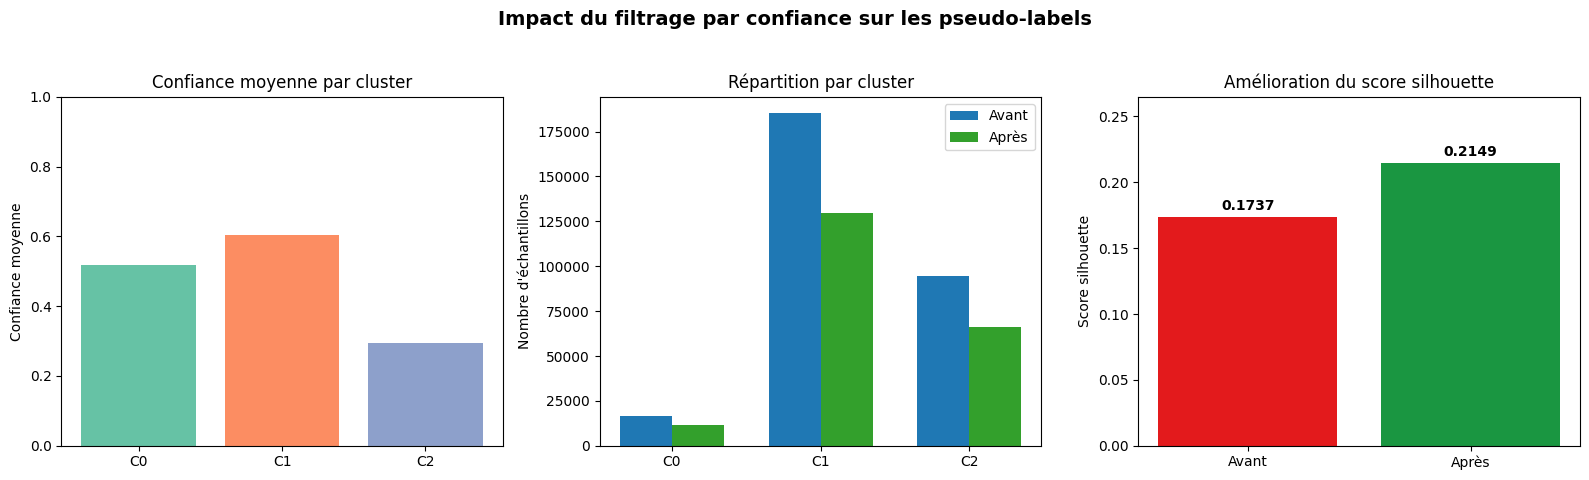

In [23]:
# Valeurs tirées de ton résumé précédent
clusters = np.array([0, 1, 2])
conf_moy = np.array([0.519024, 0.603892, 0.293489])
before_counts = np.array([16776, 185108, 94673])
after_counts = np.array([11744, 129576, 66272])
sil_before = 0.1737
sil_after = 0.2149

fig, axes = plt.subplots(1, 3, figsize=(16, 5))

# Confiance moyenne par cluster
axes[0].bar(clusters, conf_moy, color=['#66c2a5', '#fc8d62', '#8da0cb'])
axes[0].set_xticks(clusters)
axes[0].set_xticklabels([f"C{i}" for i in clusters])
axes[0].set_ylim(0, 1)
axes[0].set_ylabel("Confiance moyenne")
axes[0].set_title("Confiance moyenne par cluster")

# Répartition avant/après filtrage
width = 0.35
axes[1].bar(clusters - width/2, before_counts, width, label="Avant", color="#1f78b4")
axes[1].bar(clusters + width/2, after_counts, width, label="Après", color="#33a02c")
axes[1].set_xticks(clusters)
axes[1].set_xticklabels([f"C{i}" for i in clusters])
axes[1].set_ylabel("Nombre d'échantillons")
axes[1].set_title("Répartition par cluster")
axes[1].legend()

# Score silhouette avant/après
axes[2].bar(["Avant", "Après"], [sil_before, sil_after], color=["#e31a1c", "#1a9641"])
axes[2].set_ylim(0, max(sil_before, sil_after) + 0.05)
axes[2].set_ylabel("Score silhouette")
axes[2].set_title("Amélioration du score silhouette")
for i, v in enumerate([sil_before, sil_after]):
    axes[2].text(i, v + 0.005, f"{v:.4f}", ha="center", fontweight="bold")

plt.suptitle("Impact du filtrage par confiance sur les pseudo-labels", fontsize=14, fontweight="bold")
plt.tight_layout(rect=[0, 0.03, 1, 0.95])



Confiance moyenne par cluster : les clusters 0 et 1 présentent une confiance plus élevée que le cluster 2, indiquant que ce dernier contient davantage de points incertains.
Répartition avant/après filtrage : le filtrage a supprimé environ 30 % des points par cluster, réduisant le bruit tout en conservant un volume suffisant de données.
Score de silhouette : il est passé de 0,1737 à 0,2149 après filtrage, traduisant une meilleure séparation et compacité des clusters.
Ce filtrage permet donc de conserver les observations les plus fiables, ce qui devrait améliorer les performances lors de l’entraînement du modèle semi-supervisé.

#### Agglomerative Clustering

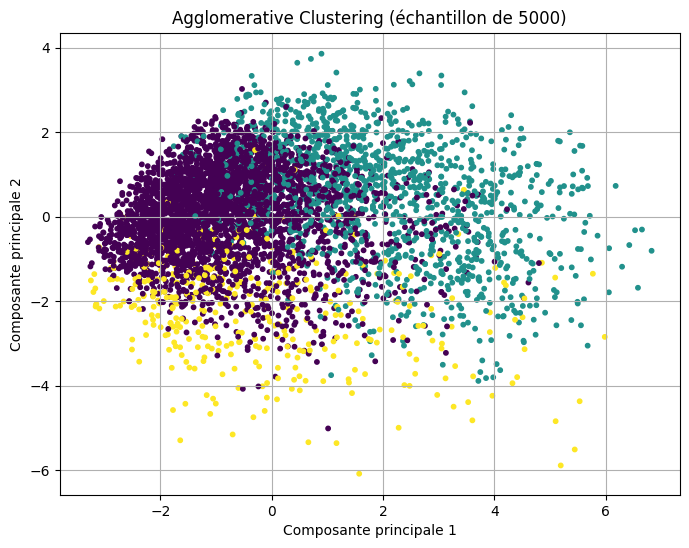

In [56]:
from sklearn.utils import resample
from sklearn.decomposition import PCA
from sklearn.cluster import AgglomerativeClustering
import matplotlib.pyplot as plt

# Étape 1 : Échantillonnage aléatoire de 5000 lignes
X_sample = resample(X_scaled_df, n_samples=5000, random_state=42)

# Étape 2 : Clustering hiérarchique (3 groupes)
agglo = AgglomerativeClustering(n_clusters=3)
clusters_agglo = agglo.fit_predict(X_sample)

# Étape 3 : Réduction dimensionnelle avec PCA (2D pour affichage)
X_pca_sample = PCA(n_components=2).fit_transform(X_sample)

# Étape 4 : Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_sample[:, 0], X_pca_sample[:, 1], c=clusters_agglo, cmap='viridis', s=10)
plt.title("Agglomerative Clustering (échantillon de 5000)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.show()





Clusters mal séparés (surtout vert/jaune),

Plus de mélange que dans KMeans,

Donc KMeans semble plus exploitable ici, malgré sa simplicité.

#### HDSCAN

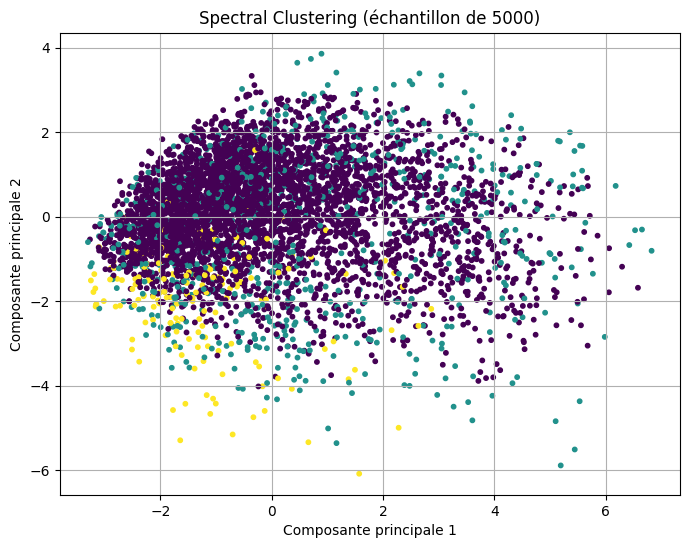

In [57]:
from sklearn.cluster import SpectralClustering
from sklearn.utils import resample
from sklearn.decomposition import PCA
import matplotlib.pyplot as plt

# 1. Échantillonner 5000 lignes
X_sample = resample(X_scaled_df, n_samples=5000, random_state=42)

# 2. Appliquer Spectral Clustering (3 clusters comme KMeans)
spectral = SpectralClustering(n_clusters=3, affinity='nearest_neighbors', assign_labels='kmeans', random_state=42)
clusters_spectral = spectral.fit_predict(X_sample)

# 3. Réduction avec PCA
X_pca_sample = PCA(n_components=2).fit_transform(X_sample)

# 4. Visualisation
plt.figure(figsize=(8, 6))
plt.scatter(X_pca_sample[:, 0], X_pca_sample[:, 1], c=clusters_spectral, cmap='viridis', s=10)
plt.title("Spectral Clustering (échantillon de 5000)")
plt.xlabel("Composante principale 1")
plt.ylabel("Composante principale 2")
plt.grid(True)
plt.show()


Spectral Clustering n'apporte aucune séparation nette.

Il y a une forte superposition entre les groupes.

KMeans reste le meilleur choix 

### reseaux de neuronnes

##### Prétraitement réduit + Clustering initial (k = 3)


In [24]:

from sklearn.cluster import MiniBatchKMeans, KMeans
#  Données standardisées 
X = X_scaled_df.astype(np.float32, copy=False).values

#  PCA ~90% de variance (cap à 20)
pca_full = PCA(n_components=None, svd_solver="full", random_state=42)
Z = pca_full.fit_transform(X)
cum = np.cumsum(pca_full.explained_variance_ratio_)
n90 = int(np.searchsorted(cum, 0.90) + 1)
n_comps = min(20, max(2, n90))

pca = PCA(n_components=n_comps, svd_solver="randomized", random_state=42)
X_red = pca.fit_transform(X).astype(np.float32)

#  MiniBatchKMeans 
mbk = MiniBatchKMeans(n_clusters=3, batch_size=8192, n_init=20, max_iter=100, random_state=42)
y_pseudo = mbk.fit_predict(X_red).astype(np.int32)

#  Sanity checks
unique, counts = np.unique(y_pseudo, return_counts=True)
print(dict(zip(unique, counts)))

sil = silhouette_score(X_red, y_pseudo, sample_size=min(20000, X_red.shape[0]), random_state=42)
print(f"Silhouette (PCA{n_comps} + MiniBatchKMeans, k=3): {sil:.4f}")



{np.int32(0): np.int64(69409), np.int32(1): np.int64(165535), np.int32(2): np.int64(61613)}
Silhouette (PCA17 + MiniBatchKMeans, k=3): 0.0973


####  Calcul de la confiance par échantillon à partir des centroïdes (k = 3)


In [25]:

from numpy.linalg import norm

centers = mbk.cluster_centers_ 
n_clusters = centers.shape[0]

# Distance à chaque centroïde
dist_all = np.stack([norm(X_red - centers[k], axis=1) for k in range(n_clusters)], axis=1)

# Distance au centroïde assigné
dist_assigned = dist_all[np.arange(len(y_pseudo)), y_pseudo]

# Moyenne des distances aux autres clusters
dist_opposed = (dist_all.sum(axis=1) - dist_assigned) / (n_clusters - 1)

# Confiance = rapport entre la distance opposée et totale
c = dist_opposed / (dist_assigned + dist_opposed + 1e-8)
c = np.clip(c, 0.2, 1.0).astype(np.float32)



##### Séparation entraînement/validation et calcul des pondérations (classes × confiance)


In [26]:

from sklearn.utils.class_weight import compute_class_weight

X_train, X_val, y_train, y_val, c_train, c_val = train_test_split(
    X_red, y_pseudo, c, test_size=0.2, random_state=42, stratify=y_pseudo
)

# Calcul des poids de classes
classes = np.unique(y_train)
class_weights_arr = compute_class_weight("balanced", classes=classes, y=y_train)
class_weight_map = {int(k): float(v) for k, v in zip(classes, class_weights_arr)}
print("Class weights:", class_weight_map)

# Pondération par échantillon = confiance × poids de classe
cw_train = np.array([class_weight_map[int(y)] for y in y_train], dtype=np.float32)
sample_weight_train = (c_train * cw_train).astype(np.float32)

cw_val = np.array([class_weight_map[int(y)] for y in y_val], dtype=np.float32)
sample_weight_val = (c_val * cw_val).astype(np.float32)


Class weights: {0: 1.424202039848482, 1: 0.5971672657343361, 2: 1.6044160411171975}


##### Construction du modèle Keras dense pour classification multi-classe (k = 3)


In [27]:
#  Modèle Keras
import tensorflow as tf
from tensorflow.keras import layers, models

def build_model(input_dim: int, n_classes: int) -> tf.keras.Model:
    inputs = layers.Input(shape=(input_dim,))
    x = layers.BatchNormalization()(inputs)
    x = layers.Dense(256, activation="relu")(x); x = layers.BatchNormalization()(x); x = layers.Dropout(0.3)(x)
    x = layers.Dense(128, activation="relu")(x); x = layers.BatchNormalization()(x); x = layers.Dropout(0.3)(x)
    x = layers.Dense(64, activation="relu")(x);  x = layers.BatchNormalization()(x); x = layers.Dropout(0.2)(x)
    outputs = layers.Dense(n_classes, activation="softmax")(x)
    model = models.Model(inputs, outputs)
    model.compile(
        optimizer=tf.keras.optimizers.Adam(1e-3),
        loss=tf.keras.losses.SparseCategoricalCrossentropy(),
        metrics=["accuracy"]
    )
    return model

model = build_model(X_train.shape[1], n_clusters)
model.summary()


C:\Users\angig\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/attr_value.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\angig\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/tensor.proto. Please update the gencode to avoid compatibility violations in the next runtime release.
  warnings.warn(
C:\Users\angig\AppData\Roaming\Python\Python313\site-packages\google\protobuf\runtime_version.py:98: UserWarning: Protobuf gencode version 5.28.3 is exactly one major version older than the runtime version 6.31.1 at tensorflow/core/framework/resource_handle.proto. Please 

Model: "functional"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ input_layer (InputLayer)        │ (None, 17)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 17)             │            68 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │         4,608 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 128)            │        32,896 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 128)            │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 128)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_2 (Dense)                 │ (None, 64)             │         8,256 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 64)             │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 64)             │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_3 (Dense)                 │ (None, 3)              │           195 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 47,815 (186.78 KB)

 Trainable params: 46,885 (183.14 KB)

 Non-trainable params: 930 (3.63 KB)

#### La justification du choix des architectures de réseaux de neurones utilisées.
Ce choix a été motivé par plusieurs considérations :

##### 1- Nature des données
Les données issues de la PCA sont tabulaires et déjà réduites à 17 composantes principales.
Une architecture dense est donc plus adaptée qu’un CNN (images) ou qu’un RNN (séries temporelles).

##### 2-Profondeur modérée pour éviter le surapprentissage
Trois couches cachées suffisent pour capter les relations non linéaires tout en limitant le risque d’overfitting, surtout avec un volume d’échantillons élevé (~300k).

##### 3-Nombre de neurones décroissant
La structure pyramidale (256 → 128 → 64) permet de capturer des interactions complexes au départ, puis de condenser progressivement l’information.

##### 4-Fonctions d’activation
ReLU est utilisée pour sa rapidité et sa capacité à limiter le problème de vanishing gradient.
Softmax en sortie pour produire des probabilités sur les 3 classes issues du clustering.

##### 5-Régularisation et stabilité
Batch Normalization après chaque couche dense pour stabiliser l’entraînement et accélérer la convergence.
Dropout (0.2 à 0.3) pour réduire le risque d’overfitting.

##### 6-Optimiseur et fonction de perte
Adam avec un taux d’apprentissage adapté (1e-3) pour un compromis entre rapidité et stabilité.
Categorical Crossentropy adaptée à un problème multi-classes avec labels pseudo-supervisés.

##### 7-Pondération par confiance et équilibrage des classes

Les poids par échantillon combinent la confiance (distance aux centroïdes) et les class weights pour compenser le déséquilibre observé entre clusters.

### Entraînement du réseau de neurones avec early stopping 


In [28]:

from tensorflow.keras import callbacks

es = callbacks.EarlyStopping(monitor="val_accuracy", mode="max", patience=5, restore_best_weights=True)
ckpt = callbacks.ModelCheckpoint("best_pseudolabel_nn.keras", monitor="val_accuracy", mode="max", save_best_only=True)

history = model.fit(
    X_train, y_train,
    validation_data=(X_val, y_val, sample_weight_val),
    sample_weight=sample_weight_train,
    epochs=50,
    batch_size=4096,
    callbacks=[es, ckpt],
    verbose=1
)


Epoch 1/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 8s 74ms/step - accuracy: 0.8527 - loss: 0.1895 - val_accuracy: 0.9578 - val_loss: 0.1144
Epoch 2/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 73ms/step - accuracy: 0.9431 - loss: 0.0733 - val_accuracy: 0.9745 - val_loss: 0.0666
Epoch 3/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 5s 93ms/step - accuracy: 0.9584 - loss: 0.0536 - val_accuracy: 0.9711 - val_loss: 0.0547
Epoch 4/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 58ms/step - accuracy: 0.9661 - loss: 0.0429 - val_accuracy: 0.9790 - val_loss: 0.0389
Epoch 5/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 62ms/step - accuracy: 0.9718 - loss: 0.0354 - val_accuracy: 0.9811 - val_loss: 0.0322
Epoch 6/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 6s 82ms/step - accuracy: 0.9747 - loss: 0.0316 - val_accuracy: 0.9900 - val_loss: 0.0199
Epoch 7/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 4s 55ms/step - accuracy: 0.9786 - loss: 0.0274 - val_accuracy: 0.9919 - val_loss: 0.0161
Epoch 8/50
58/58 ━━━━━━━━━━━━━━━━━━━━ 3s 56ms/step - accuracy: 0.9793 - loss: 0.0257 - val_accuracy: 0.9925 - v

##### Evaluation 

In [29]:
eval_res = model.evaluate(X_val, y_val, sample_weight=sample_weight_val, verbose=0)
print(dict(zip(model.metrics_names, eval_res)))


{'loss': 0.00954969972372055, 'compile_metrics': 0.9936774969100952}



--- Résultats Keras ---
loss: 0.0095
compile_metrics: 0.9937
15/15 ━━━━━━━━━━━━━━━━━━━━ 0s 29ms/step

--- Rapport de classification ---
              precision    recall  f1-score   support

           0     0.9867    0.9919    0.9893     13882
           1     0.9984    0.9935    0.9959     33107
           2     0.9889    0.9962    0.9925     12323

    accuracy                         0.9937     59312
   macro avg     0.9913    0.9939    0.9926     59312
weighted avg     0.9937    0.9937    0.9937     59312

Balanced Accuracy: 0.9939
Macro-F1: 0.9926


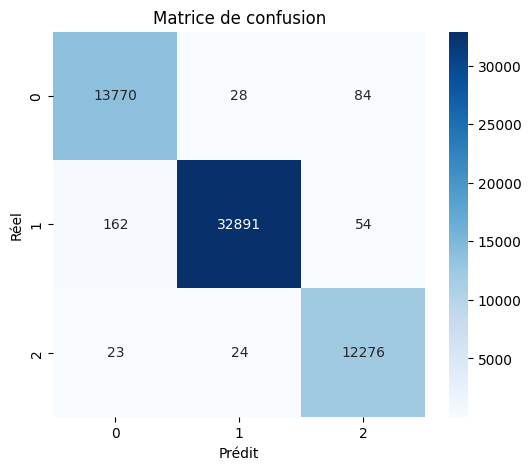

In [ ]:

# -- Évaluation finale du modèle multi-classe ---

import numpy as np
import matplotlib.pyplot as plt
from sklearn.metrics import classification_report, balanced_accuracy_score, f1_score, confusion_matrix
import seaborn as sns

#  Évaluation brute sur les données de validation
eval_res = model.evaluate(X_val, y_val, sample_weight=sample_weight_val, verbose=0)
print("\n--- Résultats Keras ---")
for name, val in zip(model.metrics_names, eval_res):
    print(f"{name}: {val:.4f}")

#  Prédictions -> argmax pour classes finales
y_val_pred_proba = model.predict(X_val, batch_size=4096)
y_pred = np.argmax(y_val_pred_proba, axis=1)

#  Rapport complet
print("\n--- Rapport de classification ---")
print(classification_report(y_val, y_pred, digits=4))

#  Balanced Accuracy & Macro-F1
balanced_acc = balanced_accuracy_score(y_val, y_pred)
macro_f1 = f1_score(y_val, y_pred, average="macro")

print(f"Balanced Accuracy: {balanced_acc:.4f}")
print(f"Macro-F1: {macro_f1:.4f}")

#  Matrice de confusion
cm = confusion_matrix(y_val, y_pred)
plt.figure(figsize=(6, 5))
sns.heatmap(cm, annot=True, fmt="d", cmap="Blues",
            xticklabels=np.unique(y_val),
            yticklabels=np.unique(y_val))
plt.xlabel("Prédit")
plt.ylabel("Réel")
plt.title("Matrice de confusion")
plt.show()


Interpretation:
Précision moyenne : 99.13 %
Rappel moyen : 99.39 %
Macro-F1 : 0.9926 (excellent équilibre précision/rappel entre les classes)
Balanced Accuracy : 0.9939 (robuste face aux déséquilibres de classes)
Accuracy globale : 99.37 %
Classe 1 est la mieux prédite (F1 = 0.9959), avec très peu de confusion.
Classe 0 et Classe 2 montrent également un haut niveau de précision, avec de rares erreurs vers la classe 1.
La matrice de confusion confirme que la majorité des erreurs sont des confusions mineures (ex. Classe 0 ↔ Classe 2).

Conclusion : Le modèle est très fiable pour différencier les trois clusters et peut servir de base solide pour une étape d’apprentissage supervisé ou semi-supervisé plus avancée.